In [25]:
import math
import cmath
import matplotlib.pyplot as plt
import random
import numpy as np

In [26]:
n = 11
N = 32
dw = math.pi * 0.1
T = 1

In [27]:
# Генерация коэффициентов косинусоид
def generate():
  w = [dw * i for i in range(n)]
  A = list(range(1, n + 1))
  random.shuffle(A)
  phi = [random.uniform(0, 0.5) for _ in range(n)]
  return w, A, phi

w, A, phi = generate()
print(f'''
  w = {w}
  A = {A}
  phi = {phi}
''')


  w = [0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793]
  A = [7, 1, 10, 9, 11, 2, 3, 6, 4, 8, 5]
  phi = [0.4622690148268522, 0.4431654855714736, 0.044349659426408006, 0.3696239859977671, 0.13935813308634715, 0.01324929081601306, 0.42339536519001847, 0.34950289123125894, 0.2258916271416247, 0.057365057542761444, 0.18049921580792916]



In [28]:
# Сгенерированные коэффициенты

w = [0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793]
A = [2, 1, 8, 5, 10, 7, 6, 11, 3, 9, 4]
phi = [0.33785569669357485, 0.23248647684059848, 0.3917624429955529, 0.057993767165982035, 0.4247444506665633, 0.454128256896334, 0.3996500754750942, 0.22441622269575007, 0.0792848793029533, 0.10232991229754218, 0.27385006680932694]

In [29]:
# Сигнал

def s(t):
  return sum([A[i] * math.cos(w[i]*t + phi[i]) for i in range(n)])

In [30]:
# Дискретные отсчёты
Xn = list(range(N))
# Отсчёты для графика аналогового сигнала
X = [i * N / (2**12) for i in range(2**12)]

S = [s(x) for x in Xn]

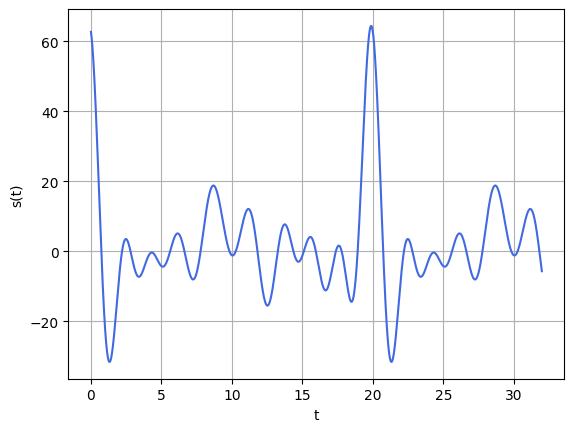

In [31]:
# Аналоговый сигнал
plt.plot(X, [s(x) for x in X], color='royalblue')

plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.show()
!

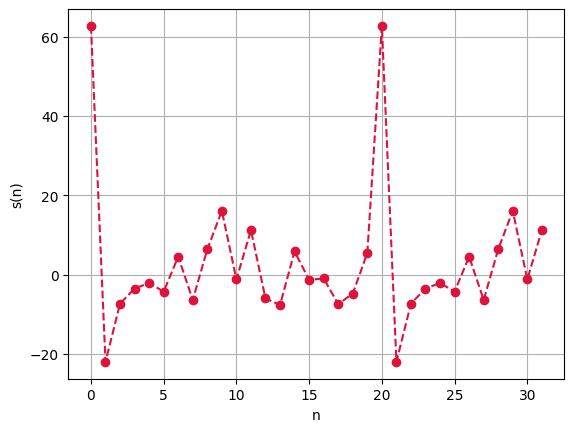

In [32]:
# Дискретизированный сигнал
plt.plot(Xn, S, 'o--', color='crimson')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.show()
!

In [33]:
# Преобразование фурье для исходного сигнала

W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi
F = np.fft.fft(S, norm='forward')[:N // 2] * 2

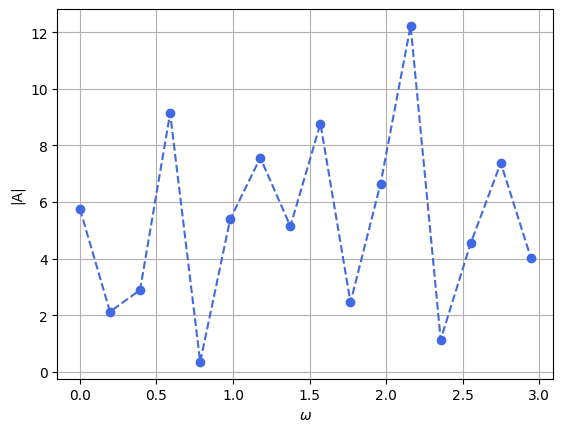

In [34]:
# Спектр исходного сигнала
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.show()
!

In [35]:
# Линейное сглаживание по 5 точкам
def L_5(S):
  y = []
  for i in range(2, N - 2):
    y.append((S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2]) / 5)
  return ([0] * 2) + y + ([0] * 2)

# Линейное сглаживание по 9 точкам
def L_9(S):
  y = []
  for i in range(4, N - 4):
    y.append((S[i-4] + S[i-3] + S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2] + S[i+3] + S[i+4]) / 9)
  return ([0] * 4) + y + ([0] * 4)

In [36]:
Y_L_5 = L_5(S)
Y_L_9 = L_9(S)

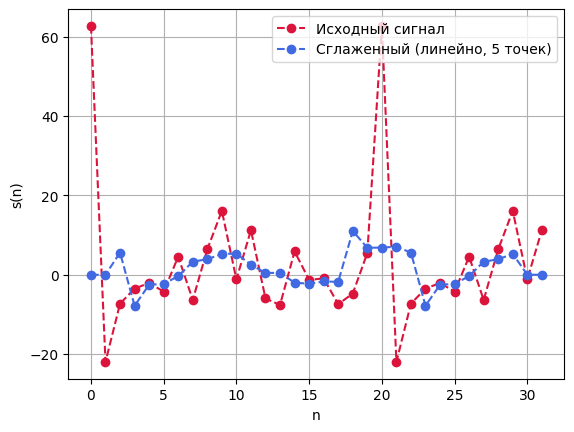

In [37]:
# Сглаженный сигнал (линейно 5 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_L_5, 'o--', color='royalblue', label='Сглаженный (линейно, 5 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

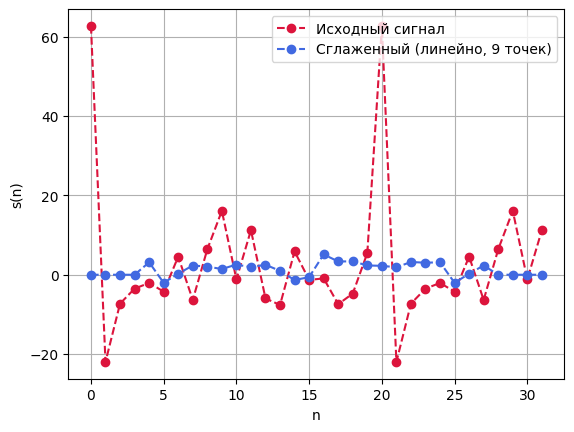

In [38]:
# Сглаженный сигнал (линейно 9 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_L_9, 'o--', color='royalblue', label='Сглаженный (линейно, 9 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [39]:
# Преобразование фурье для сглаженного сигнала (линейное)

F_L_5 = np.fft.fft(Y_L_5, norm='forward')[:N // 2] * 2
F_L_9 = np.fft.fft(Y_L_9, norm='forward')[:N // 2] * 2

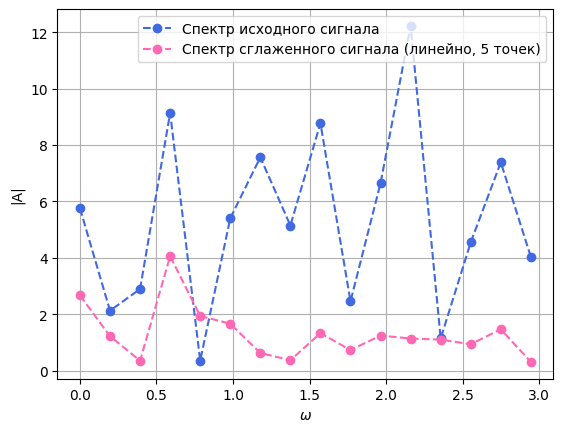

In [40]:
# Спектр сглаженного сигнала (линейный 5 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_L_5], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 5 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

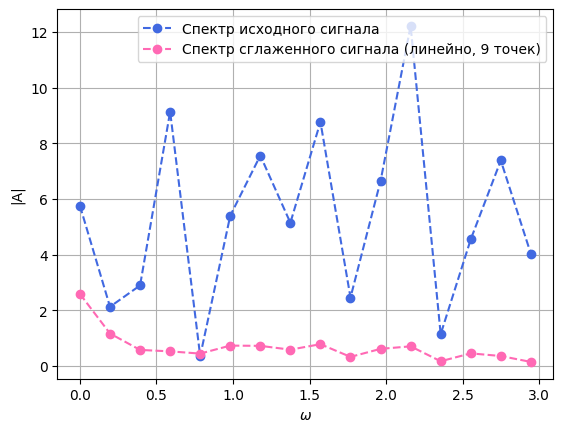

In [41]:
# Спектр сглаженного сигнала (линейный 9 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_L_9], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 9 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

In [42]:
# Сглаживание второй степени по 5 точкам
def S_5(S):
  y = []
  for i in range(2, N - 2):
    y.append((-3*S[i-2] + 12*S[i-1] + 17*S[i] + 12*S[i+1] - 3*S[i+2]) / 35)
  return ([0] * 2) + y + ([0] * 2)

# Сглаживание второй степени по 9 точкам
def S_9(S):
  y = []
  for i in range(4, N - 4):
    y.append((
        -21*S[i-4] + 14*S[i-3] + 39*S[i-2] + 54*S[i-1] + 59*S[i] +
        54*S[i+1] + 39*S[i+2] + 14*S[i+3] - 21*S[i+4]
        ) / 231)
  return ([0] * 4) + y + ([0] * 4)

In [43]:
Y_S_5 = S_5(S)
Y_S_9 = S_9(S)

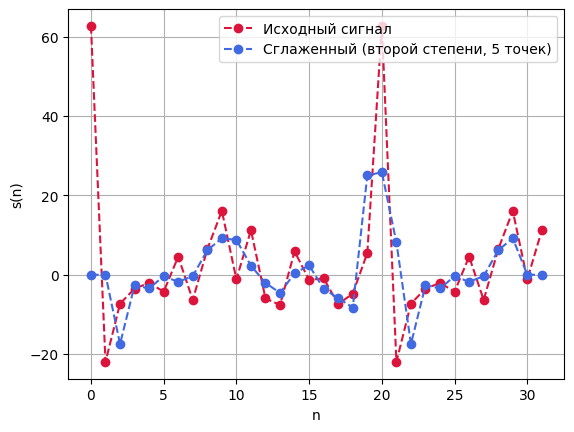

In [44]:
# Сглаженный сигнал (второй степени 5 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_S_5, 'o--', color='royalblue', label='Сглаженный (второй степени, 5 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

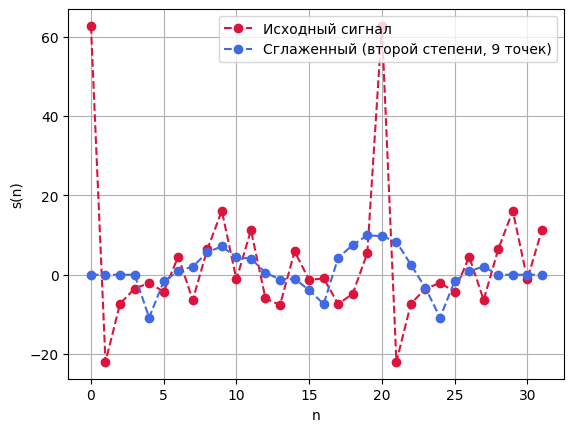

In [45]:
# Сглаженный сигнал (второй степени 9 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_S_9, 'o--', color='royalblue', label='Сглаженный (второй степени, 9 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [46]:
# Преобразование фурье для сглаженного сигнала (второй степени)

F_S_5 = np.fft.fft(Y_S_5, norm='forward')[:N // 2] * 2
F_S_9 = np.fft.fft(Y_S_9, norm='forward')[:N // 2] * 2

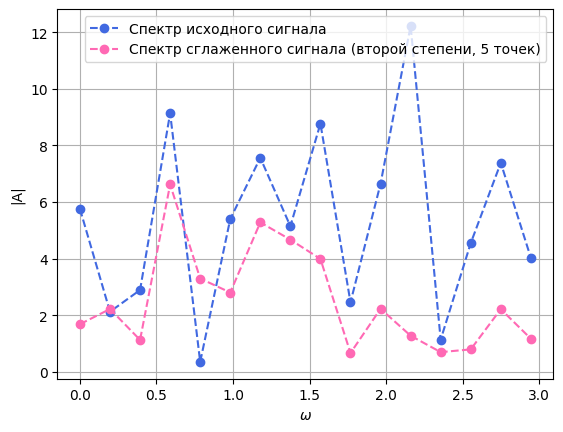

In [47]:
# Спектр сглаженного сигнала (второй степени 5 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_S_5], 'o--', color='hotpink', label='Спектр сглаженного сигнала (второй степени, 5 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

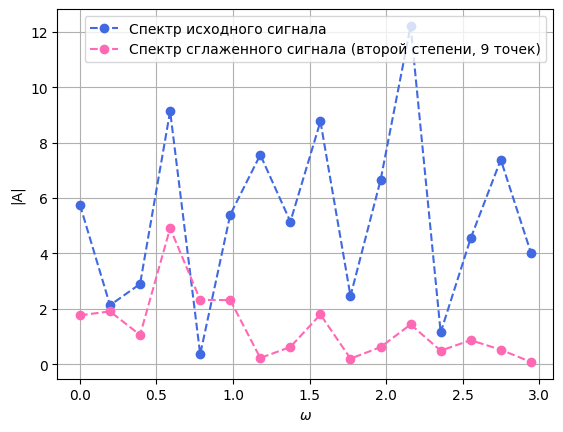

In [48]:
# Спектр сглаженного сигнала (второй степени 9 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_S_9], 'o--', color='hotpink', label='Спектр сглаженного сигнала (второй степени, 9 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

In [49]:
# Сглаживание четвёртой степени по 7 точкам
def Q_7(S):
  y = []
  for i in range(3, N - 3):
    y.append((
        5*S[i-3] - 30*S[i-2] + 75*S[i-1] + 131*S[i]
        + 75*S[i+1] - 30*S[i+2] + 5*S[i+3]
        ) / 231)
  return ([0] * 3) + y + ([0] * 3)

# Сглаживание четвёртой степени по 11 точкам
def Q_11(S):
  y = []
  for i in range(5, N - 5):
    y.append((
        18*S[i-5] - 45*S[i-4] - 10*S[i-3] + 60*S[i-2] + 120*S[i-1] + 143*S[i] +
        120*S[i+1] + 60*S[i+2] - 10*S[i+3] - 45*S[i+4] + 18*S[i+5]
        ) / 429)
  return ([0] * 5) + y + ([0] * 5)

In [50]:
Y_Q_7 = Q_7(S)
Y_Q_11 = Q_11(S)

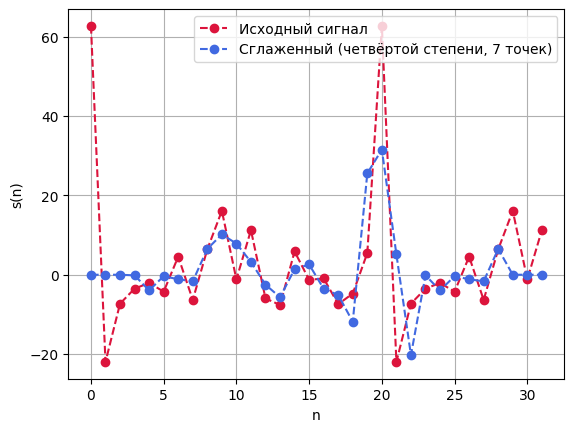

In [51]:
# Сглаженный сигнал (четвёртой степени 7 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_Q_7, 'o--', color='royalblue', label='Сглаженный (четвёртой степени, 7 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

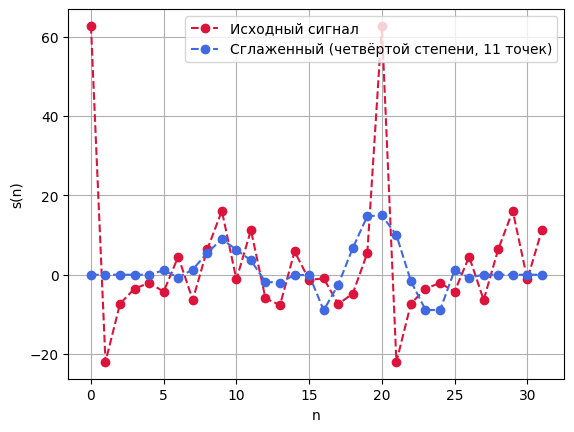

In [52]:
# Сглаженный сигнал (четвёртой степени 11 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_Q_11, 'o--', color='royalblue', label='Сглаженный (четвёртой степени, 11 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [53]:
# Преобразование фурье для сглаженного сигнала (четвёртой степени)

F_Q_7 = np.fft.fft(Y_Q_7, norm='forward')[:N // 2] * 2
F_Q_11 = np.fft.fft(Y_Q_11, norm='forward')[:N // 2] * 2

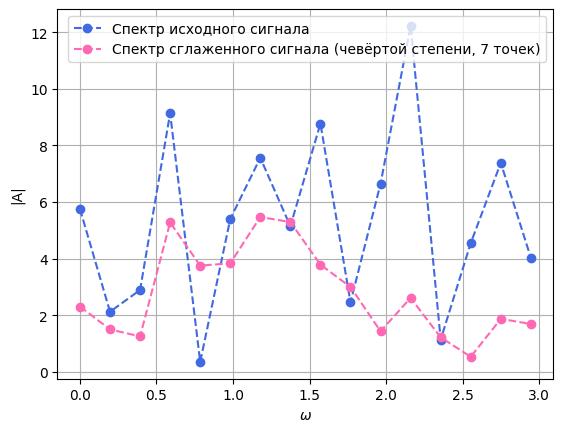

In [54]:
# Спектр сглаженного сигнала (четвёртой степени 7 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_Q_7], 'o--', color='hotpink', label='Спектр сглаженного сигнала (чевёртой степени, 7 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

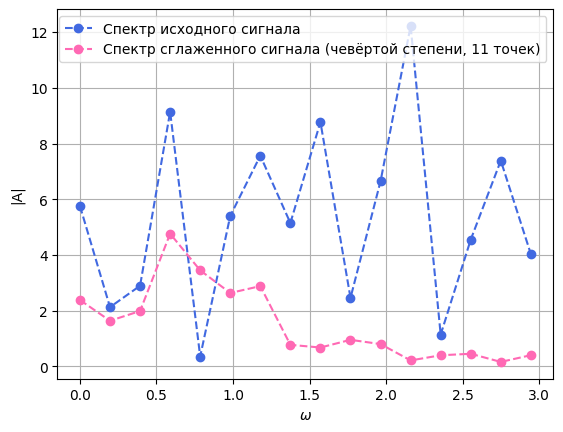

In [55]:
# Спектр сглаженного сигнала (четвёртой степени 11 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_Q_11], 'o--', color='hotpink', label='Спектр сглаженного сигнала (чевёртой степени, 11 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!